<a href="https://colab.research.google.com/github/arundhathips/DataScienceLab_arundhathi10/blob/main/arundhathi_10_02_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Problem Statement

Program to implement k-means clustering technique using any standard dataset available in the public domain

---

### Dataset Description

In this project, we will be using the dataset holding the information of carbon dioxide emission from different car models.

The dataset includes 36 instances with 5 columns which can be briefed as:

|Column|Description|
|-|-|
|Car|Brand of the car|
|||
|Model|Model of the car|
|||
|Volume|Total space available inside the car (in $litres$)|
|||
|Weight|Total weightof the car (in $kg$)|
|||
|$CO_2$|Total emission of carbon dioxide from the car|
|||



**Note:** *(This is a manually created custom dataset for this project.*)

---

### List of Activities
 
**Activity 1:** Import Modules and Read Data

**Activity 2:** Data Cleaning
  
**Activity 3:** Find Optimal Value of `K`

**Activity 4:** Plot Silhouette Scores

#### Activity 1: Import Modules and Read Data

Import the necessary Python modules along with the following modules:

 - `KMeans` - For clustering using K-means. 

 - `re` - To remove unwanted rows using regex.

Read the data from a CSV file to create a Pandas DataFrame and go through the necessary data-cleaning process (if required).

**Dataset link:** https://raw.githubusercontent.com/jiss-sngce/CO_3/main/jkcars.csv

In [ ]:
# Import the modules and Read the data.
import numpy as np
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/jiss-sngce/CO_3/main/jkcars.csv')

# Print the first five records
df.head()


,Car,Model,Volume,Weight,CO2
0,Mitsubishi,Space Star,1200,1160,95
1,Skoda,Citigo,1000,929,95
2,Fiat,500,900,865,90
3,Mini,Cooper,1500,1140,105
4,VW,Up!,1000,929,105


In [ ]:
# Get the total number of rows and columns, data types of columns and missing values (if exist) in the dataset. 
df.shape
df.dtypes
df.isnull().sum()

Car       0
Model     0
Volume    0
Weight    0
CO2       0
dtype: int64




#### Activity 3: Find Optimal value of K

In this activity, you need to find the optimal value of `K` using the silhouette score.

1. Create a subset of the dataset consisting of three columns i.e `Volume`, `Weight`, and `CO2`.



In [ ]:
# Create a new DataFrame consisting of three columns 'Volume', 'Weight', 'CO2'. 
new_df = df[['Volume','Weight','CO2']]

# Print the first 5 rows of this new DataFrame.
new_df.head()

,Volume,Weight,CO2
0,1200,1160,95
1,1000,929,95
2,900,865,90
3,1500,1140,105
4,1000,929,105


2. Compute K-Means clustering for the 3D dataset `data_3d` by varying `K` from `2` to `10` clusters. Also, for each `K`, calculate silhouette score using `silhouette_score` function. 

 **Steps to Follow**

 - Create an empty list to store silhouette scores obtained for each `K` (let's say `sil_scores`).

 - Initiate a `for` loop that ranges from 2 to 10.

 -  Perform K-means clustering for the current value of `K` inside `for` loop. 
    
 - Use `fit()` and `predict()` to create clusters.

 - Calculate silhouette score for current `K` value using `silhouette_score()` function and append it to the empty list `sil_scores`.

 - Create a DataFrame with two columns. The first column must contain `K` values from 2 to 10 and the second column must contain silhouette values obtained after the `for` loop.



In [ ]:
#Calculate inertia for different values of 'K'.
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans 
# Create an empty list to store silhouette scores obtained for each 'K' 
sil_scores = []
clusters = range(2,11)

for k in clusters:
  kmean_k = KMeans (n_clusters = k, random_state=10)
  kmean_k.fit(new_df)
  cluster_labels = kmean_k.predict(new_df)
  sil_scores.append(silhouette_score(new_df,cluster_labels))

sil_data = pd.DataFrame({'K value':clusters,'silhouette_score':sil_scores})
sil_data
#sil_scores

,K value,silhouette_score
0,2,0.466982
1,3,0.569304
2,4,0.506027
3,5,0.537547
4,6,0.549792
5,7,0.525962
6,8,0.509034
7,9,0.461402
8,10,0.434958


**Q**: What are the maximum silhouette score and the corresponding cluster value?

**A**: 
- Maximum silhouette score: 0.569304

- Corresponding cluster value: 3

---

#### Activity 4: Plot silhouette Scores & WCSS Scores to find optimal value for K

Create a line plot with `K` ranging from `2` to `10`  on the $x$-axis and the silhouette scores stored in `sil_scores` list on the $y$-axis. 

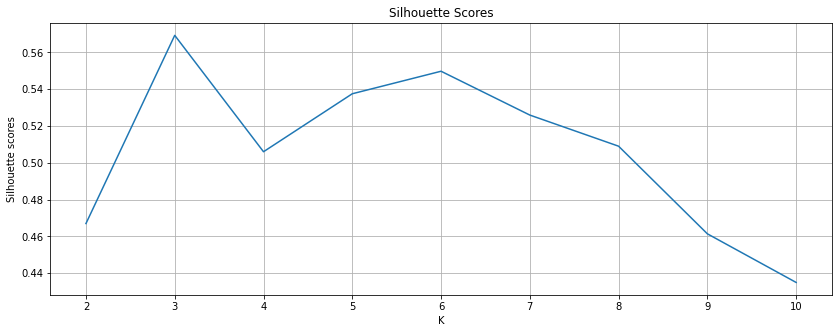

In [ ]:
# Plot silhouette scores vs number of clusters.
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(14,5))
plt.title('Silhouette Scores')
x = np.arange(2,11)
plt.xlabel('K')
plt.ylabel('Silhouette scores')
plt.grid()
y = (sil_scores)
plt.plot(x,y)
plt.show()


**Q:** Write your observations of the graph.

**A:** From the graph, we can conclude that the optimal value of `K` is 3.

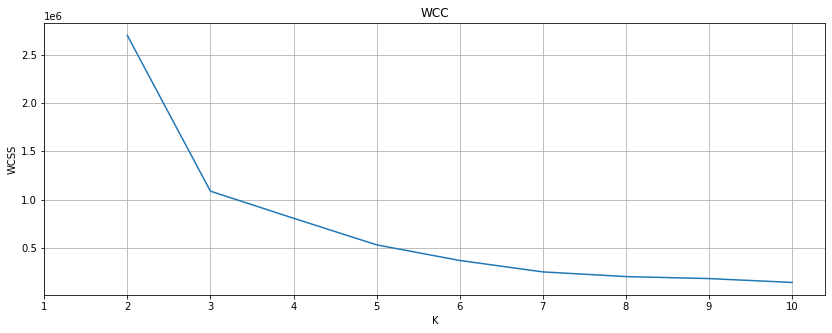

In [ ]:
# S3.1: Determine 'K' using Elbow method.
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans 
wcss=[]
clusters=range(2,11)


# Initiate a for loop that ranges from 1 to 10.
for k in clusters:
    # Inside for loop, perform K-means clustering for current value of K. Use 'fit()' to train the model.
    kmean_k=KMeans(n_clusters=k,random_state=10)
    kmean_k.fit(new_df)
    
    # Find wcss for current K value using 'inertia_' attribute and append it to the empty list.
    wcss.append(kmean_k.inertia_)
    
# Plot WCSS vs number of clusters.
plt.figure(figsize=(14,5))
plt.title('WCC')
plt.plot(clusters,wcss)
plt.xlabel('K')
plt.ylabel("WCSS")
plt.grid()
plt.xticks(range(1,11))
plt.show()


In [ ]:
# Clustering the dataset for K = 3
from sklearn.cluster import KMeans

# Perform K-Means clustering with n_clusters = 4 and random_state = 10
kmeans_model=KMeans(n_clusters=3,random_state=10)


# Fit the model to the scaled_df
kmeans_model.fit(new_df)


# Make a series using predictions by K-Means
cluster_labels=pd.Series(kmeans_model.predict(new_df))
cluster_labels.value_counts()

2    16
1     9
0     7
dtype: int64

In [ ]:
# Create a DataFrame with cluster labels for cluster visualisation 
km_df=pd.concat([df,cluster_labels],axis=1)
km_df.columns=list(df.columns)+['label']
km_df


,Car,Model,Volume,Weight,CO2,label
0,Mitsubishi,Space Star,1200,1160,95,0
1,Skoda,Citigo,1000,929,95,0
2,Fiat,500,900,865,90,0
3,Mini,Cooper,1500,1140,105,2
4,VW,Up!,1000,929,105,0
5,Skoda,Fabia,1400,1109,90,2
6,Ford,Fiesta,1500,1112,98,2
7,Audi,A1,1600,1150,99,2
8,Hyundai,I20,1100,980,99,0
9,Suzuki,Swift,1300,990,101,0


---